In [1]:
import scipy
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from math import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap


In [2]:
def nu1(nu):
    global k, M_1, delta_Beta_1
    f = (((sin(nu))**2 - (1/M_1**2))/((k + 1)/2 - ((sin(nu))**2 - (1/M_1**2)))) * (1/tan(nu)) - tan(delta_Beta_1)
    return f


In [3]:
def nu2(nu):
    global k, M_2, delta_Beta_2
    f = (((sin(nu))**2 - (1/M_2**2))/((k + 1)/2 - ((sin(nu))**2 - (1/M_2**2)))) * (1/tan(nu)) - tan(delta_Beta_2)
    return f


In [4]:
def nu3(nu):
    global k, M_3, delta_Beta_3
    f = (((sin(nu))**2 - (1/M_3**2))/((k + 1)/2 - ((sin(nu))**2 - (1/M_3**2)))) * (1/tan(nu)) - tan(delta_Beta_3)
    return f


In [5]:
def func(Beta):
    global M_1, M_2, M_3, k, nu_1, nu_2, nu_3, Beta_0, Beta_3, delta_Beta_1, delta_Beta_2, delta_Beta_3
    Beta_1 = Beta[0]
    Beta_2 = Beta[1]
    lambd_1 = M_1 * (((k + 1)/2)/(1 + (k - 1)/2 * M_1**2))**(1/2)
    delta_Beta_1 = Beta_1 - Beta_0
    sol = scipy.optimize.root_scalar(nu1, bracket = [0.00001, radians(65)], method = 'brentq')
    nu_1 = sol.root
    sigma_1 = ((((k+1)/2)**((k+1)/(k-1)))/((1/((M_1**2)*(sin(nu_1)**2))+(k-1)/2)**(k/(k-1)) * (k*(M_1**2)*(sin(nu_1))**2-(k-1)/2)**(1/(k-1))))
    
    lambd_2 = lambd_1 * cos(nu_1)/cos(nu_1 - delta_Beta_1)
    M_2 = lambd_2 * ((2/(k + 1))/(1 - (k - 1)/(k + 1) * lambd_2**2))**(1/2)
    delta_Beta_2 = Beta_2 - Beta_1
    sol = scipy.optimize.root_scalar(nu2, bracket = [0.00001, radians(65)], method = 'brentq')
    nu_2 = sol.root
    sigma_2 = ((((k+1)/2)**((k+1)/(k-1)))/((1/((M_2**2)*(sin(nu_2)**2))+(k-1)/2)**(k/(k-1)) * (k*(M_2**2)*(sin(nu_2))**2-(k-1)/2)**(1/(k-1))))

    lambd_3 = lambd_2 * cos(nu_2)/cos(nu_2 - delta_Beta_2)
    M_3 = lambd_3 * ((2/(k + 1))/(1 - (k - 1)/(k + 1) * lambd_3**2))**(1/2)
    delta_Beta_3 = Beta_3 - Beta_2
    sol = scipy.optimize.root_scalar(nu3, bracket = [0.00001, radians(65)], method = 'brentq')
    nu_3 = sol.root
    sigma_3 = ((((k+1)/2)**((k+1)/(k-1)))/((1/((M_3**2)*(sin(nu_3)**2))+(k-1)/2)**(k/(k-1)) * (k*(M_3**2)*(sin(nu_3))**2-(k-1)/2)**(1/(k-1))))

    sigma_sum = sigma_1 * sigma_2 * sigma_3
    
    return sigma_sum


In [6]:
def func_max(Beta):
    global M_1, M_2, M_3, k, nu_1, nu_2, nu_3, Beta_0, Beta_3, delta_Beta_1, delta_Beta_2, delta_Beta_3
    Beta_1 = Beta[0]
    Beta_2 = Beta[1]
    lambd_1 = M_1 * (((k + 1)/2)/(1 + (k - 1)/2 * M_1**2))**(1/2)
    delta_Beta_1 = Beta_1 - Beta_0
    sol = scipy.optimize.root_scalar(nu1, bracket = [0.00001, radians(65)], method = 'brentq')
    nu_1 = sol.root
    sigma_1 = ((((k+1)/2)**((k+1)/(k-1)))/((1/((M_1**2)*(sin(nu_1)**2))+(k-1)/2)**(k/(k-1)) * (k*(M_1**2)*(sin(nu_1))**2-(k-1)/2)**(1/(k-1))))
    
    lambd_2 = lambd_1 * cos(nu_1)/cos(nu_1 - delta_Beta_1)
    M_2 = lambd_2 * ((2/(k + 1))/(1 - (k - 1)/(k + 1) * lambd_2**2))**(1/2)
    delta_Beta_2 = Beta_2 - Beta_1
    sol = scipy.optimize.root_scalar(nu2, bracket = [0.00001, radians(65)], method = 'brentq')
    nu_2 = sol.root
    sigma_2 = ((((k+1)/2)**((k+1)/(k-1)))/((1/((M_2**2)*(sin(nu_2)**2))+(k-1)/2)**(k/(k-1)) * (k*(M_2**2)*(sin(nu_2))**2-(k-1)/2)**(1/(k-1))))
    
    lambd_3 = lambd_2 * cos(nu_2)/cos(nu_2 - delta_Beta_2)
    M_3 = lambd_3 * ((2/(k + 1))/(1 - (k - 1)/(k + 1) * lambd_3**2))**(1/2)
    delta_Beta_3 = Beta_3 - Beta_2
    sol = scipy.optimize.root_scalar(nu3, bracket = [0.00001, radians(65)], method = 'brentq')
    nu_3 = sol.root
    sigma_3 = ((((k+1)/2)**((k+1)/(k-1)))/((1/((M_3**2)*(sin(nu_3)**2))+(k-1)/2)**(k/(k-1)) * (k*(M_3**2)*(sin(nu_3))**2-(k-1)/2)**(1/(k-1))))
    
    sigma_sum = sigma_1 * sigma_2 * sigma_3
    
    return -sigma_sum


In [8]:
M_1 = 3
k = 1.4
Beta_0 = 0
Beta_3 = radians(25)

b1_max = np.array([])
b2_max = np.array([])
sigma_max = np.array([])


In [9]:
def callback_max(Xi):
    global b1_max, b2_max, sigma_max
    b1_max = np.append(b1_max, Xi['x'][0])
    b2_max = np.append(b2_max, Xi['x'][1])
    sigma_max = np.append(sigma_max, Xi['fun'])
    pass


In [10]:
x0 = [0.2, 0.2]

In [11]:
bounds = scipy.optimize.Bounds(0, radians(34))
res_max = minimize(func_max, x0, method = 'SLSQP', 
               #constraints=[linear_constraint],
               options = {'ftol': 1e-9, 'disp': True},
               #callback = callback_max,
               bounds = bounds
              )


Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.9523844023096807
            Iterations: 6
            Function evaluations: 20
            Gradient evaluations: 6


In [12]:
B1 = np.linspace(0, radians(33), 100)
B2 = np.linspace(0, radians(33), 100)

sigmas = np.array([])

for b2 in B2:
    for b1 in B1:
        sigma = func([b1, b2])
        sigmas = np.append(sigmas, sigma)

sigmas = np.reshape(sigmas, (len(B1), len(B2)))
B1 = np.linspace(0, 33, len(B1))
B2 = np.linspace(0, 33, len(B2))
B1, B2 = np.meshgrid(B1, B2)


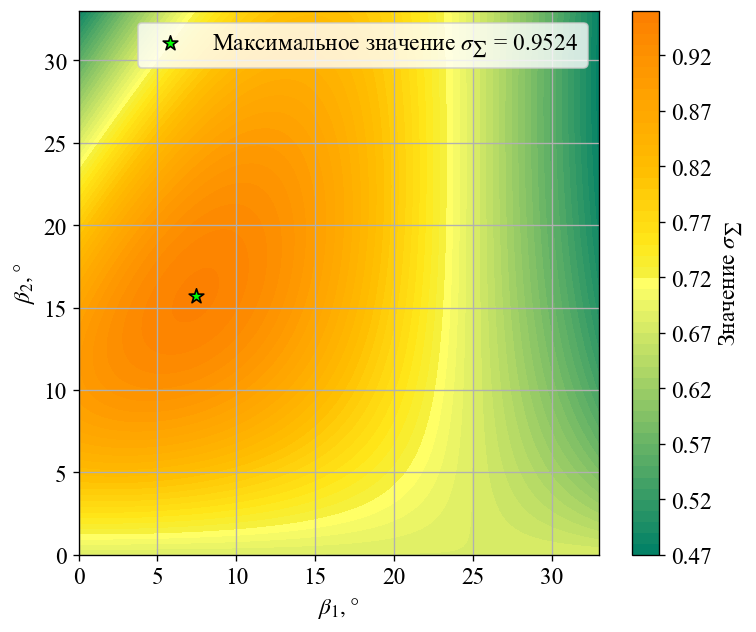

In [14]:
Wistia = cm.get_cmap('Wistia', 256)
newcolors = Wistia(np.linspace(0, 1, 256))
newcolors[:128, :] = cm.get_cmap('summer', 128)(np.linspace(0, 1, 128))
newcolors[128:257, :] = cm.get_cmap('Wistia', 128)(np.linspace(0.13, 1, 128))
newcmp = ListedColormap(newcolors)

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams['font.size'] = '14'

fig = plt.figure(num = 0, figsize = (7, 6), dpi = 120)
ax = plt.axes()
plt.colorbar(plt.contourf(B1, B2, sigmas,
             levels = 50, 
             cmap = newcmp), label = 'Значение $\sigma_{\sum}$')
plt.scatter(degrees(res_max.x[0]), degrees(res_max.x[1]),
            s = 85, c = 'lime', marker = '*', edgecolor = 'k',
           label = r'Максимальное значение $\sigma_{\sum}$ = 0.9524')
#plt.colorbar().set_label('Значение $\sigma_{\sum}$')
plt.xlabel(r'$\beta_1, \degree$')
plt.ylabel(r'$\beta_2, \degree$')
plt.legend()
plt.grid()


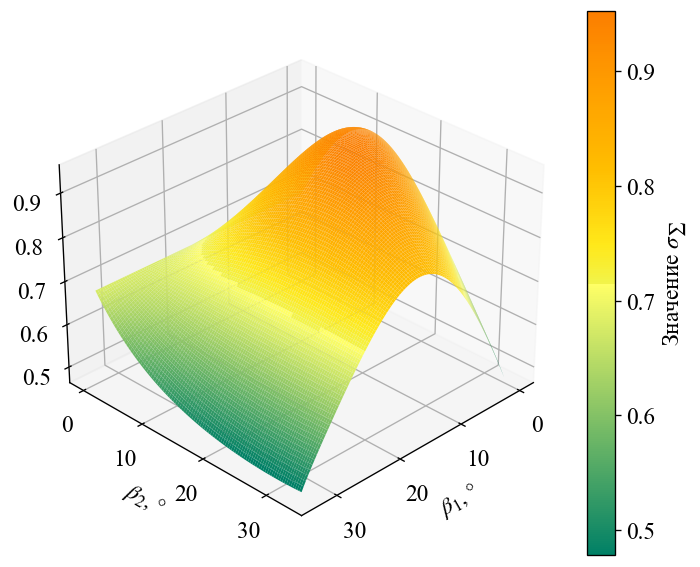

In [15]:
fig = plt.figure(num = 0, figsize = (7, 6), dpi = 120)
ax = fig.add_subplot(1, 1, 1, projection = '3d')
surf = ax.plot_surface(B1, B2, sigmas, rstride = 1, cstride = 1, cmap = newcmp)
plt.xlabel(r'$\beta_1, \degree$')
plt.ylabel(r'$\beta_2, \degree$')
plt.colorbar(surf, label = 'Значение $\sigma_{\sum}$')
ax.view_init(30, 45)